In [4]:
from api_wrappers.kraken_wrapper import KrakenWrapper

wrapper = KrakenWrapper(lb_interval="1day")

all_assets = wrapper.get_assets("USD")
print(len(all_assets))
for asset in all_assets:
    print(asset + "\n")

474
1INCHUSD

AAVEUSD

ABUSD

ACAUSD

ACHUSD

ACTUSD

ACXUSD

ADAUSD

ADXUSD

AEROUSD

AEVOUSD

AGLDUSD

AI16ZUSD

AIOZUSD

AIRUSD

AIXBTUSD

AKTUSD

ALCHUSD

ALCXUSD

ALGOUSD

ALICEUSD

ALPHAUSD

ALTUSD

ANKRUSD

ANLOGUSD

ANONUSD

APENFTUSD

APEUSD

API3USD

APTUSD

APUUSD

ARBUSD

ARCUSD

ARKMUSD

ARPAUSD

ARUSD

ASRRUSD

ASTRUSD

ATHUSD

ATLASUSD

ATOMUSD

AUCTIONUSD

AUDIOUSD

AUDUSD

AURAUSD

AUSD

AVAAIUSD

AVAXUSD

AXSUSD

B3USD

BABYUSD

BADGERUSD

BALUSD

BANANAS31USD

BANDUSD

BATUSD

BCHUSD

BDXNUSD

BEAMUSD

BERAUSD

BICOUSD

BIGTIMEUSD

BIOUSD

BITUSD

BLURUSD

BLZUSD

BMTUSD

BNBUSD

BNCUSD

BNTUSD

BOBAUSD

BODENUSD

BONDUSD

BONKUSD

BRICKUSD

BSXUSD

BTTUSD

C98USD

CAKEUSD

CATUSD

CCDUSD

CELOUSD

CELRUSD

CFGUSD

CHEEMSUSD

CHEXUSD

CHILLHOUSEUSD

CHRUSD

CHZUSD

CLANKERUSD

CLOUDUSD

CLVUSD

CMETHUSD

COMPUSD

COOKIEUSD

COQUSD

CORNUSD

COTIUSD

COWUSD

CPOOLUSD

CQTUSD

CROUSD

CRVUSD

CSMUSD

CTSIUSD

CVCUSD

CVXUSD

CXTUSD

CYBERUSD

DAIUSD

DASHUSD

DBRUSD

D

In [ ]:
hist_dict = wrapper.pull_kraken_hist_usd_simple()

KeyboardInterrupt: 

In [50]:
test_key = list(hist_dict.keys())[42]
test_result = hist_dict[test_key]

print(test_key)
for row in test_result:
    print(row[-2])

AUDUSD
778366.72182973
646602.00663816
1010521.15207516
794962.25301269
252700.78328920
186246.41287168
437782.13964074
665420.51919969
795590.31843784
918826.05967347
1550004.15487115
205159.79862141
587502.34483569
2150234.89671476
1048447.16128904
1365655.17391113
1060231.79777276
839590.28054886
177226.99486125
229007.37807822
1281797.81163499
618081.52590523
488881.11812698
422448.74993076
860927.03153698
214846.09904492
136721.68330325
414536.00459182
416529.63373945
496849.72466724
400665.66758336
336644.25269715
116058.94007358
155528.41364633
525803.38119721
473958.00518680
279504.97125512
311973.53842358
712449.42169465
148662.60102603
125991.24921356
949898.70351330
545732.45316930
950135.44976106
654555.02386177
481610.42959466
36833.63739708
109161.62277111
546694.74426397
141189.33605513
490093.23529607
392390.80460327
524842.48047314
42968.68824056
211735.87001265
329745.08751236
215445.60472636
325065.10779582
756140.44172617
578460.10392527
78236.10854549
204989.903402

In [45]:
import pandas as pd
bar_data_names = ["date","open","high","low","close","vwap","volume","drop"]
df = pd.DataFrame(test_result, columns=bar_data_names)
print(df.head())

         date     open     high      low    close     vwap            volume  \
0  1691452800  0.65719  0.65802  0.65081  0.65368  0.65447   778366.72182973   
1  1691539200  0.65365  0.65868  0.65246  0.65387  0.65610   646602.00663816   
2  1691625600  0.65405  0.65883  0.65139  0.65290  0.65368  1010521.15207516   
3  1691712000  0.65246  0.65419  0.64853  0.65038  0.65158   794962.25301269   
4  1691798400  0.65000  0.65204  0.64896  0.64986  0.65049   252700.78328920   

   drop  
0  1416  
1  1922  
2  1356  
3  1247  
4   592  


Mean: 5.542182688196062e-06


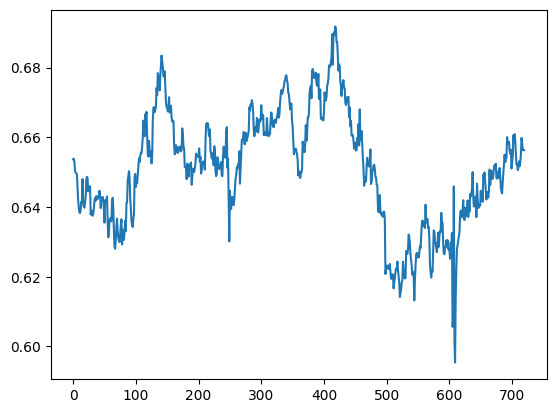

In [46]:
import numpy as np
import matplotlib.pyplot as plt
df['close'] = pd.to_numeric(df['close'], errors='coerce')
log_returns = np.log(df['close']).diff().dropna()

plt.plot(df['close'])

print("Mean:", log_returns.mean())

In [47]:
sigma = log_returns.std()

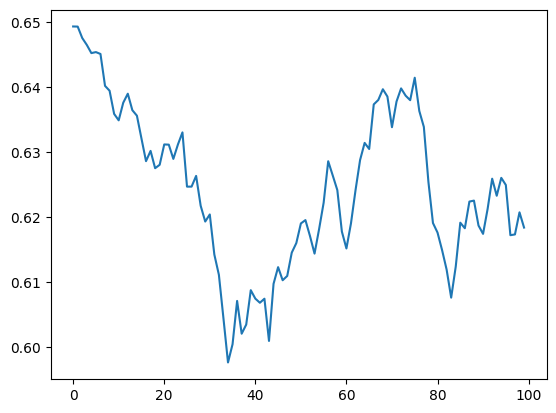

In [48]:
from utils.synthetic_data_service import SyntheticOHLCVGenerator


dg = SyntheticOHLCVGenerator(
    mu=log_returns.mean(),
    sigma=sigma,
    dt=1,  # If your data is daily, dt=1
    n_steps=100,  # Number of data points to generate
    seed=89,  # For reproducibility
    #start_price=df['close'].iloc[-1]  # Start from the last close price
)

test_data = dg.generate(start=df['close'].iloc[-1])
df_test = pd.DataFrame(test_data, columns=bar_data_names)

plt.plot(df_test['close'])



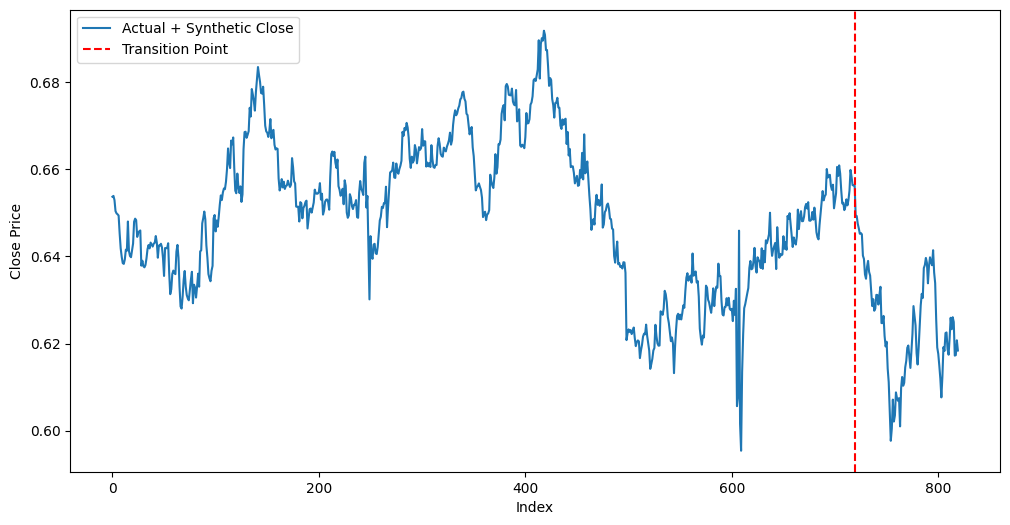

In [49]:
# Ensure both DataFrames have the same columns and index order
df = df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Concatenate real and synthetic data
combined_df = pd.concat([df, df_test], ignore_index=True)

# Plot the combined close prices
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(combined_df['close'], label='Actual + Synthetic Close')
plt.axvline(len(df)-1, color='red', linestyle='--', label='Transition Point')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

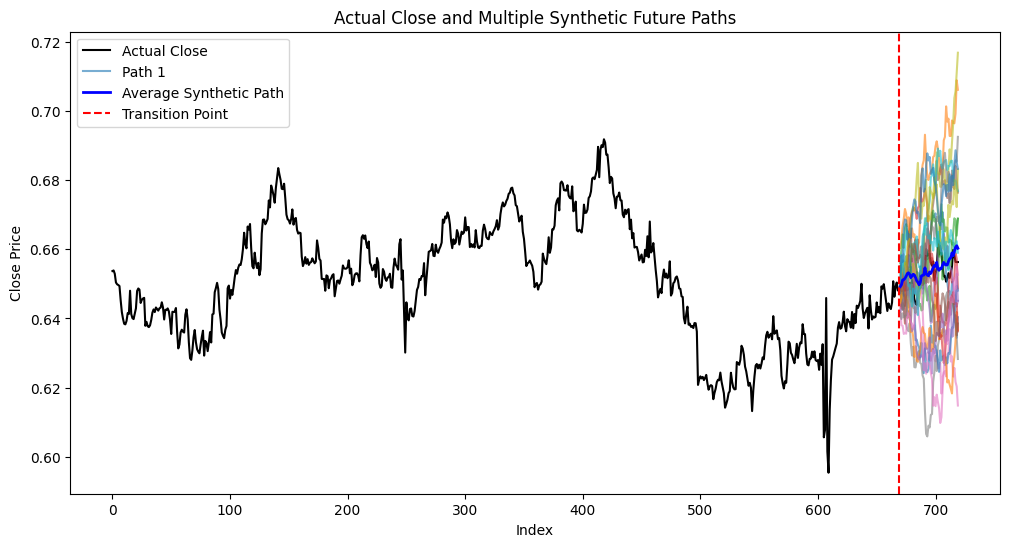

In [ ]:
# Number of synthetic paths to generate
seeds = [21, 42, 63, 84, 105, 126, 147, 168, 189, 210]  # Different seeds for variety
seeds = range(100, 100 + 21)
num_paths = len(seeds)
gen_start = len(df) - 50  # Start generating synthetic paths from the last 100 points of actual data
synthetic_paths = []

for seed in seeds:
    dg = SyntheticOHLCVGenerator(
        mu=log_returns.mean(),
        sigma=sigma,
        dt=1,
        n_steps=50,
        seed=seed
    )
    test_data = dg.generate(start=df['close'].iloc[-50])
    synthetic_paths.append(test_data['close'].values)

# Plot actual data
plt.figure(figsize=(12, 6))
plt.plot(df['close'], color='black', label='Actual Close')

# Plot all synthetic paths

'''for i, path in enumerate(synthetic_paths):
    plt.plot(range(len(df)-50, len(df) + len(path)-50), path, alpha=0.6, label=f'Path {i+1}' if i == 0 else None)'''

# Convert list of arrays to a 2D NumPy array
paths_array = np.array(synthetic_paths)  # shape: (num_paths, n_steps)

# Calculate the average path
avg_path = paths_array.mean(axis=0)
# Plot the average synthetic path
plt.plot(range(len(df)-50, len(df) + len(avg_path) - 50), avg_path, color='blue', linewidth=2, label='Average Synthetic Path')


plt.axvline(len(df)-51, color='red', linestyle='--', label='Transition Point')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.title('Actual Close and Multiple Synthetic Future Paths')
plt.show()